# Entrega 2

## Códigos y Criptografía

### Javier Abad Hernández

In [745]:
import random
from sage.misc.prandom import randrange
from sage.misc.randstate import current_randstate
import math
import time
import matplotlib.pyplot as plt

#### Ejercicio 1

##### Implementa una función que tenga como input el alfabeto fuente y la frecuencia de cada símbolo y tenga como output una codificación trivial para este canal. ¿Cuáles el número medio de bits usados para transmitir un símbolo?

In [746]:
#Primero vamos a crear todas las funciones necesarias y despues más adelante haré la llamada a las dos funciones.

def cod_trivial(a,b):
    c=d=e=0
    for i in range(len(a)):
        d=2^i
        if(not d<len(a)):
            d=2^(i-1)
            e=2^i
            break
            
    positive_binary = '{0:b}'.format(e-1)
    print("El mayor numero a representar es: ", e-1, " que en binario es: ", positive_binary, 
          " \nPor lo que el numero medio de bits usados es: ", len(positive_binary))


##### Implementa una función que tenga como input el alfabeto fuente y la frecuencia de cada símbolo y tenga como output un código compresor óptimo (código Huffman) para este canal. ¿Cuáles el número medio de bits usados para transmitir un símbolo?
(La implementación de este segundo apartado es común con Carlos Martin y Alejandro Pulido).

In [747]:
class NodeTree(object):
    def __init__(self, left=None, right=None):
        self.left = left
        self.right = right

    def children(self):
        return self.left, self.right

    def _str_(self):
        return self.left, self.right
    
# Función que crea el codigo de Huffman a partir del árbol
def Codigo_Huffman(node, binString=''):
    if type(node) is str:
        return {node: binString}
    (l, r) = node.children()
    d = dict()
    d.update(Codigo_Huffman(l, binString + '1'))
    d.update(Codigo_Huffman(r, binString + '0'))
    return d

# Funcion que crea el arbol binario
def creaArbol(nodes):
    while len(nodes) > 1:
        (key1, c1) = nodes[-1]
        (key2, c2) = nodes[-2]
        nodes = nodes[:-2]
        node = NodeTree(key1, key2)
        nodes.append((node, c1 + c2))
        nodes = sorted(nodes, key=lambda x: x[1], reverse=True)
    return nodes[0][0]

def huffman(alfabeto, frecuencias):
    freq = {}
    for i in range(len(alfabeto)):
        freq[alfabeto[i]] = round(frecuencias[i],2)

    print("Diccionario de caracteres y frecuencias: \n")
    print(freq)
    freq2=freq

    freq = sorted(freq.items(), key=lambda x: x[1], reverse=True)

    # Creamos el arbol binario
    arbol = creaArbol(freq)

    # Convertimos el arbol a el codigo de Huffman
    codificacion = Codigo_Huffman(arbol)
    print("\n************ SOLUCIÓN ************")
    # Impresión del codigo de Huffman
    print("SÍMBOLO        |      CODIFICACIÓN")

    z=0
    for simbolo, codigo in codificacion.items():
        print(" ",simbolo,"         ---->       ",codigo)
        z=z+(len(codigo)*freq2.get(simbolo))


    print("El número medio de bits es: ", z)
    


In [748]:
import numpy as np
a = ["a","b","c","d","e"]
b = [0.20,0.15,0.05,0.15,0.45]

print("***************************************************\n******************* APARTADO 1 ********************\n***************************************************")
cod_trivial(a,b)
print("\n***************************************************\n******************* APARTADO 2 ********************\n***************************************************")

huffman(a,b)

***************************************************
******************* APARTADO 1 ********************
***************************************************
El mayor numero a representar es:  7  que en binario es:  111  
Por lo que el numero medio de bits usados es:  3

***************************************************
******************* APARTADO 2 ********************
***************************************************
Diccionario de caracteres y frecuencias: 

{'a': 0.2, 'b': 0.15, 'c': 0.05, 'd': 0.15, 'e': 0.45}

************ SOLUCIÓN ************
SÍMBOLO        |      CODIFICACIÓN
  e          ---->        1
  a          ---->        01
  b          ---->        001
  c          ---->        0001
  d          ---->        0000
El número medio de bits es:  2.1


#### Episodio 2

##### Implementa una función que, dados dos primos p y q, calcule la clave pública y la clave privada del criptosistema RSA.

In [749]:
seed(0) #tomamos semilla del random

def rsa_clave(p,q):
    n=p*q
    phi=(p-1)*(q-1)
    minimo=0
    e=0
    while(minimo!=1): #buscamos un e cuyo mcd(e,phi)==1
        e=randrange(phi) 
        minimo=gcd(e,phi)
    d=inverse_mod(e,phi)
    return n,e,d,phi

In [750]:
p=307
q=409
n,e,d,phi=rsa_clave(p,q)
print("La clave publica es:[n="+str(n)+",e="+str(e)+"]")
print("La clave privada es:[d="+str(d)+",p="+str(p)+",q="+str(q)+",phi="+str(phi)+"]")

La clave publica es:[n=125563,e=95161]
La clave privada es:[d=99817,p=307,q=409,phi=124848]


##### Implementa una función que, dada la clave pública (n, e) de un criptosistema RSA y un mensaje en Zn, cifre dicho mensaje.

In [751]:
def rsa_cifrado(n,e,m): #cifrado menssaje rsa
    c=power_mod(m,e,n)
    return c

In [752]:
mensaje=12456 # mensaje a cifrar 0<M<n
cifrado=rsa_cifrado(n,e,mensaje)
print("El mensaje cifrado es: "+str(cifrado))

El mensaje cifrado es: 497


##### Implementa una función que, dada la clave privada d de un criptosistema RSA y un mensaje crifrado con la función anterior, descifre dicho mensaje.

In [753]:
def rsa_descifrado(d,c,n): #descifrado mensaje de rsa
    m=power_mod(c,d,n)
    return m

In [754]:
descifrado=rsa_descifrado(d,cifrado,n)
print("El mensaje descifrado es: "+str(descifrado))

El mensaje descifrado es: 12456


#### Ejercicio 3

##### Implementa una funci´on que dada la clave pública de un criptosistema RSA y un texto M escrito con el alfabeto ZN , cifre dicho mensaje. Por ejemplo N puedeser igual a 256 y considerar el código ASCII. Nota: el tamaño del bloque será k, con N^k ≤ n < N^k+1.
##### Implementa una funci´on que dada la clave privada de un criptosistema RSA y un texto crifrado con la funci´on anterior, descifre dicho texto

In [755]:
#ejercicio 3

def rsa_bloques_cifrado(mensaje, k):
    # Calculo n
    N = 256
    limite_inferior = N ** k  # N^k
    limite_superior = N ** (k + 1)  # N^k+1

    raiz = Integer(limite_inferior).sqrt()  # Para conseguir los números primos y que sean distantes

    p = 0
    q = 0
    iterador = 100

    # Pararemos cuando los primos sean diferentes y N^k<=n y N^(k+1)>n
    while p == q or limite_inferior > (p * q) or limite_superior <= (p * q):
        p = next_prime(raiz - 250 * iterador)
        q = next_prime(raiz + 1000 * iterador)  # 1000 y 250 para que se diferencien bien entre sí
        iterador += 1

    n, e, d, phi = rsa_clave(p, q)  # Obtengo las claves del RSA

    # Descompongo en bloques de k -> lista de strings de tamaño k cada uno: 0:k-1
    lista_palabras = dividir_mensaje(mensaje, k)

    palabra_cifrada = ""
    for i in lista_palabras:
        lista = cifrado_bloque(i, k, N, e, n)  # Ciframos cada uno de los bloques yobtenemos una lista de código ASCII cifradas
        for j in lista:
            palabra_cifrada += chr(j)  # Pasamos los números cifrados ASCII a letras y lo juntamos en un string

    return palabra_cifrada, N, d, n

def rsa_bloques_descifrado(mensaje, N, k, d, n):
    # Dividimos el mensaje cifrado en bloques de tamaño k
    lista_palabras = dividir_mensaje(mensaje, k)
    
    # Cadena de texto que almacenará el mensaje descifrado
    palabra_descifrada = ""

    # Iteramos sobre cada bloque del mensaje cifrado
    for i in lista_palabras:
        # Desciframos el bloque utilizando la función descifrado_bloque
        lista = descifrado_bloque(i, N, k, d, n)
        
        # Iteramos sobre cada caracter descifrado del bloque
        for j in lista:
            # Convertimos el caracter descifrado a su código ASCII y lo añadimos a la cadena de texto
            palabra_descifrada += chr(j)
            
    # Devolvemos el mensaje descifrado
    return palabra_descifrada



################################################################################
#Funciones auxiliares
################################################################################

#funcion que lo que nos hace es dividir un mensaje muy grande en [m1,m2,m3,...,mk] siendo la longitud de cada uno de 
#esos mi de k(0:k-1)
# Función que divide un mensaje en bloques de tamaño k
def dividir_mensaje(mensaje, k):
    # Divide el mensaje en bloques de tamaño k
    lista_palabras = [mensaje[i:i+k] for i in range(0, len(mensaje), k)]
    
    # Si el último bloque tiene longitud menor que k, lo rellena con espacios
    if len(lista_palabras[-1]) < k:
        lista_palabras[-1] += " " * (k - len(lista_palabras[-1]))
        
    return lista_palabras


# Función que cifra un bloque utilizando el algoritmo RSA
def cifrado_bloque(M, k, N, e, n):
    # Calcula el mensaje en base N
    m = sum(ord(M[i]) * N ** (k - i - 1) for i in range(k))
    
    # Cifra el mensaje utilizando el algoritmo RSA
    c = power_mod(m, e, n)
    
    # Calcula c en base N
    lista = []
    while c >= N:
        lista.insert(0, c % N)
        c //= N
    lista.insert(0, c)
    
    return lista

# Función que descifra un bloque utilizando el algoritmo RSA
def descifrado_bloque(lista,N,k,d,n):
    iterador=0
    c=0
    for i in range(len(lista)): #len(lista) puede ser k o k+1
        c+=ord(lista[-i-1])*pow(N,0+iterador) #empezamos por atras a calcular ci porque puede seer que tengamos k o k+1
        iterador+=1
    b=power_mod(c,d,n)  #calculo bi
    # Calcula b en base N
    bases = []
    while b >= N:
        bases.insert(0, b % N)
        b //= N
    bases.insert(0, b)
    
    return bases


In [798]:
k=6
palabra_cifrada,N,d,n=rsa_bloques_cifrado("soy javier y esto es una prueba del rsa en bloque",k)
print("La palabra cifrada es:",palabra_cifrada)
palabra_descifrada=rsa_bloques_descifrado(palabra_cifrada,N,k,d,n)
print("La palabra descifrada es:",palabra_descifrada)

La palabra cifrada es: ÷yõeD-`g=N9Þdi©Ã§,{@ÉùhÇlHÌû³ÅL¹´êûti	óZ©	J·FÃ
La palabra descifrada es: soy javier y esto es una prueba del rsa en bloque     


#### Ejercicio 4

##### Implementa una función por fuerza bruta que dado n = p · q producto de dos primos, factorice n. Es decir, encuentre p y q.

In [801]:
def fuerza_bruta(n):
    raiz=int(math.sqrt(n))
    for i in range(1,raiz+1): #los primos a encontrar iran de 1 hasta la raiz de n | podria empezar el bucle desde raiz+1 hasta 1
        numero_primo=next_prime(i)
        if(n%numero_primo==0): #el primo encontrado divide a n por lo que vamos a buscar el otro primo si lo hay
            otro_primo=n/numero_primo
            encontrado=ZZ(otro_primo).is_prime() #es primo el otro ?
            if(encontrado):
                return numero_primo,otro_primo
        i=numero_primo  #los de antes hasta que hemos encontrado al primer primo los desechamos. los hemos evaluado antes
    return 0,0

In [802]:
p,q=fuerza_bruta(259)
if(p!=0 and q!=0):
    print("p="+str(p)+" q="+str(q))


p=7 q=37


##### b) Implementa una funcion por fuerza bruta que dada la clave publica (n,e) del criptosistema RSA, calcule phi(n).

In [803]:
#calculamos phi de forma bruta con la funcion anterior
def bruta_phi(n,e):
    #e<phi(n)<n   -> de hecho es uno muy cercano a n
    #mcd(e,phi)=1
    #phi=(p-1)*(q-1)
    
    #por temas de simplicidad y costes voy a utilizar directamente la funcion de fuerza bruta para n y posteriormente calculo
    #phi , ya que si no tendria una lista de posibles phis que cumplen las 2 primeras condiciones anteriores y posteriormente
    #tocaria llamar a la funcion fuerza bruta
    
    #no utilizo e
    
    p,q=fuerza_bruta(n)
    phi=(p-1)*(q-1)
    return phi
    

In [804]:
ne=rsa_clave(p,q)
phi=bruta_phi(ne[0],ne[1])
print("phi="+str(phi))

phi=216


##### c) Implementa una funci´on por fuerza que dada la clave p´ublica (n, e) del criptosistema RSA, calcule la clave privada d = e^−1 mod n.

In [805]:
#sacar a fuerza bruta la clave privada d
def bruta_d(n,e):
    phi=bruta_phi(n,e)
    d=inverse_mod(e,phi)
    return d

In [806]:
d=bruta_d(ne[0],ne[1])
print("d="+str(d))

d=61


##### d) Implementa una función por fuerza bruta que dados g, p y A, con g un generador e Z∗p, calcule el logaritmo discreto de A en base g modulo p: log g (A) mod p

In [807]:

def encontrar_generadores(q):
    # Verificamos que q sea un número primo
    p= 2*q + 1
    while not p.is_prime():
        q = next_prime(q)
        p= 2*q + 1
        
    #Busco g tal que, 1<g<p-1 y que ademas, cumpla con lo siguiente: g^2 != 1 mod p y que g^g != 1 mod p
    
    g = random.randint(1,p-1)
    
    while 1:
        if power_mod(g,2,p) != 1 and power_mod(g,g,p) != 1:
            break
        else:
            g = random.randint(1,p-1)        
    
    return p,g

def logaritmo_discreto(g, p, A):
    # Verificamos que g y p sean enteros y A sea un elemento de Zp
    g = Integer(g)
    p = Integer(p)
    A = Zp(p)(A)
    # Iteramos desde 0 hasta p-1
    for i in range(p):
        # Calculamos el valor de g^i módulo p
        val = power_mod(g,i,p)
        # Si g^i es igual a A, entonces hemos encontrado el logaritmo discreto
        if val == A:
            return i
    # Si no encontramos ningún valor que sea igual a A, devolvemos -1
    return -1

In [26]:
cifras=[]
tiempo=[]

q=1
for i in range(8):
    q=q.next_prime()
    cifras.append(len(str(q)))
    p,g=encontrar_generadores(q)
    A = random.randint(1,p-1)
    print("p es :", p, "g es : ",g, " y A es: ",A)
    t0 = time.time()
    ld=logaritmo_discreto(g,p,A)
    t1 = time.time()
    tiempo.append(t1-t0)
    if (ld==-1):
        print("No se ha encontrado el logaritmo discreto.")
    else:
        print("Se ha encontrado el logaritmo discreto log g (A) mod p, y es: ", ld)
    q=q*10
print(cifras,tiempo)



p es : 5 g es :  3  y A es:  2
Se ha encontrado el logaritmo discreto log g (A) mod p, y es:  3
p es : 47 g es :  25  y A es:  3
Se ha encontrado el logaritmo discreto log g (A) mod p, y es:  10
p es : 467 g es :  400  y A es:  158
Se ha encontrado el logaritmo discreto log g (A) mod p, y es:  29
p es : 4679 g es :  1756  y A es:  4631
Se ha encontrado el logaritmo discreto log g (A) mod p, y es:  889
p es : 46679 g es :  24939  y A es:  4653
No se ha encontrado el logaritmo discreto.
p es : 467183 g es :  368129  y A es:  93498
No se ha encontrado el logaritmo discreto.
p es : 4666967 g es :  3990416  y A es:  3152381
Se ha encontrado el logaritmo discreto log g (A) mod p, y es:  2057403
p es : 46669307 g es :  4466493  y A es:  3024576
Se ha encontrado el logaritmo discreto log g (A) mod p, y es:  28113073
[1, 2, 3, 4, 5, 6, 7, 8] [0.0013828277587890625, 0.0021276473999023438, 0.0008175373077392578, 0.0070683956146240234, 0.31107473373413086, 3.489107370376587, 13.464669466018677, 18

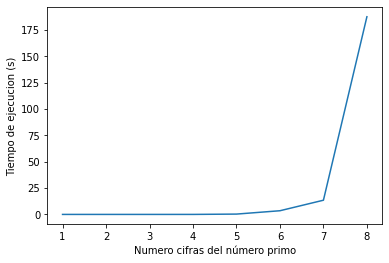

In [808]:
plt.plot(cifras,tiempo)
plt.xlabel("Numero cifras del número primo")
plt.ylabel("Tiempo de ejecucion (s)")
plt.show()

##### e) ¿Hasta que tamaño del input las funciones anteriores son capaces de terminar? ¿hemos atacado con éxito los criptosistema RSA y ElGamal?

Siempre que se cumpla que n sea producto de 2 numero primos, seremos capaces de terminar. Se han hecho pruebas y cuanto mayor sean estos números, mayor será el coste a la hora de factorizar n. 
Para comprobarlo he realizado pruebas a mano pero sin anotarlas, pero también he hecho una representación tomando datos de tiempo y distintos tamaños del apartado d), lo puedes ver en la gráfica anterior.

A la segunda pregunta, si que hemos sido capaces de atacar con éxito.



#### Ejercicio 5

##### Implementa una función que firme digitalmente un mensaje usando la firma digital con ElGamal y una función hash. Se puede usar cualquier función hash que el alumno quiera, en SageMath y Python está por ejemplo implementada la función hash(). Se puede truncar o reducir por un módulo el output de función hash. El input debe ser la clave privada de ElGamal (también son necesarios p y g) y el mensaje a firmar. El output debe ser la firma.

In [809]:
#firma digital con rsa con hash
def firma_digital_elgamal(p,g,a,mensaje):
    while True:
        k = int(random.randint(1,p-2))
        if (gcd(k,p-1)==1):
            break

    k = Integer(k)

    hash_mensaje=hash(mensaje)
    r=power_mod(g,k,p)
    S1=inverse_mod(k,p-1)
    S2=power_mod(hash_mensaje-a*r,1,p-1)

    S=S1*S2 % (p-1)
    
    firma=[r,S]
    
    return firma

##### Implementa una función que dado un mensaje, una firma y una clave pública dede ElGamal, compruebe si la firma del mensaje es válida o no, de acuerdo a la firma digital implementada con la función anterior.

In [810]:
def verificar_firma(firma,mensaje,p,g,A):
    # Desempaqueta la firma en r y S
    r=firma[0]
    s=firma[1]
    
    if (1<r and r<=p-1):
        c1=(power_mod(A,r,p)*power_mod(r,s,p)%p)%p
        c2=(power_mod(g,hash(mensaje),p))
    if (c1==c2):
        return "Firma valida"
    else:
        return "Firma invalida"


In [811]:
p=23
g=7
a=13
A=power_mod(g,a,p)
mensaje='8'

firma=firma_digital_elgamal(p,g,a,mensaje)
print("El mensaje y su firma es:",mensaje, firma)
valida=verificar_firma(firma,mensaje,p,g,A)
print(valida)

El mensaje y su firma es: 8 [5, 11]
Firma valida


#### Ejercicio 6

##### Implementa una función que firme digitalmente un mensaje usando la firma digital con ElGamal y una función hash. Y que además también cifre el mensaje usando RSA. El input debe ser la clave privada de Alice (de ElGamal), la clave pública de Bob (de RSA) y el mensaje a firmar. El output debe ser el mensaje cifrado y su firma.

In [812]:
#EJERCICIO 6

def firmar_y_cifrar_mensaje(p, g, clave_privada_alice, clave_publica_bob, mensaje):
    # Primero, firmamos el mensaje con la función firma_digital_elgamal
    firma = firma_digital_elgamal(p, g, clave_privada_alice, mensaje)
    
    # Luego, obtenemos la clave pública y privada de RSA a partir de p y q
    n, e, d, phi = rsa_clave(p, clave_publica_bob)
    # Ciframos el mensaje con RSA
    mensaje_cifrado = rsa_cifrado(n, e, mensaje)
    # Devolvemos el mensaje cifrado y su firma
    return mensaje_cifrado, firma, d

##### Implementa una función que dado un mensaje cifrado y una firma, descifre el mensaje y compruebe que la firma es válida, de acuerdo al método de la función anterior. El input debe ser la clave pública de Alice (de ElGamal), la clave privada de Bob (de RSA), el mensaje cifrado y la firma. El output debe ser el mensaje descifrado y un mensaje que nos diga si la firma era válida o no.

In [813]:
def descifrar_y_verificar_firma(p, g, clave_privada_bob, clave_publica_alice, mensaje_cifrado, firma, n):
    # Primero, desciframos el mensaje con RSA
    mensaje = rsa_descifrado(clave_privada_bob, mensaje_cifrado, n)
    
    # Luego, verificamos la firma con la función verificar_firma_digital_elgamal
    es_valida = verificar_firma(firma, mensaje, p, g, clave_publica_alice)
    
    return mensaje, es_valida

In [814]:
mensaje=4
priv_alice=13 #Clave privada alice
p=23
g=7
pub_bob=7 #clave publica bob
# Luego, obtenemos la clave pública y privada de RSA a partir de p y q
pub_alice_elgamal=power_mod(g,a,p)
print("El mensaje es: ", mensaje)


mensaje_cifrado, firma, priv_bob_rsa= firmar_y_cifrar_mensaje(p,g,priv_alice,pub_bob,mensaje)
print("El mensaje cifrado es: ",mensaje_cifrado, " y su firma es: ", firma)
print(descifrar_y_verificar_firma(p, g, priv_bob_rsa, pub_alice_elgamal, mensaje_cifrado, firma, p*pub_bob))


El mensaje es:  4
El mensaje cifrado es:  151  y su firma es:  [5, 7]
(4, 'Firma valida')
